In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mu = [np.array([1, 0]), np.array([-0.5, 0.5*np.sqrt(3)]), np.array([-0.5, -0.5*np.sqrt(3)])]
cov = np.identity(2)
size = 30
K = 3
S = 0.25*np.identity(2)
x = [np.random.multivariate_normal(mu[k], S, size=size) for k in range(K)]

m = [np.mean(y, axis=0) for y in x] # sample means

def slope(j, k):
    return -(m[k][0] - m[j][0])/(m[k][1] - m[j][1])

def intercept(j, k):
    return 0.5*(m[k].dot(m[k]) - m[j].dot(m[j]))/(m[k][1] - m[j][1])

m01 = slope(0, 1)
m02 = slope(0, 2)
m12 = slope(1, 2)

b01 = intercept(0, 1)
b02 = intercept(0, 2)
b12 = intercept(1, 2)

P = ((b01 - b02)/(m02 - m01), m01*(b01 - b02)/(m02 - m01) + b01)
Q01 = ((2 - b01)/m01, 2)
Q02 = ((-2 - b02)/m02, -2)
Q12 = (-2, m12*(-2) + b12)

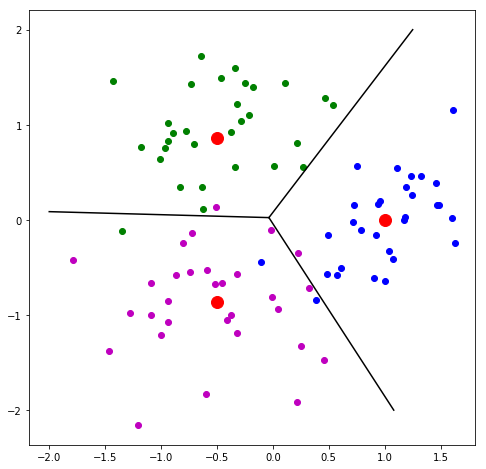

In [3]:
markers = ['bo', 'go', 'mo']
plt.figure(figsize=(8, 8))
for k in range(K):
    plt.plot(mu[k][0], mu[k][1], 'ro', markersize=12)
    plt.plot(x[k][:,0], x[k][:,1], markers[k])
plt.plot([P[0], Q01[0]], [P[1], Q01[1]], 'k')
plt.plot([P[0], Q02[0]], [P[1], Q02[1]], 'k')
plt.plot([P[0], Q12[0]], [P[1], Q12[1]], 'k')
plt.show()

In [4]:
def decision_boundary(m0, S0, m1, S1):
    S0_inv = np.linalg.inv(S0)
    S1_inv = np.linalg.inv(S1)
    def f(x):
        return (x - m0).dot(S0_inv.dot(x - m0)) - (x - m1).dot(S1_inv.dot(x - m1))
    return f

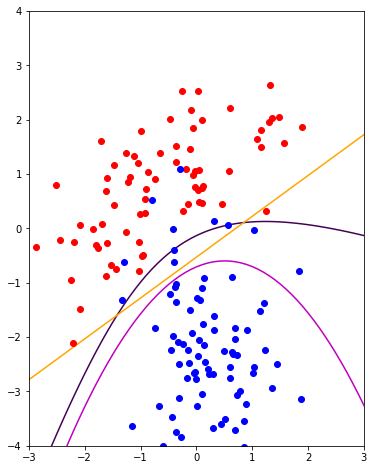

In [5]:
def ZZ(x, y, m, S_inv):
    Z = np.zeros((len(x), len(x)))
    for i in range(len(x)):
        for j in range(len(y)):
            u = np.array([x[i], y[j]]) 
            v = np.array([x[i], y[j]]) - m
            Z[i, j] = v.dot(S_inv.dot(v))
    return Z


size = 80
mu0 = np.array([-1, 0.5])
Sigma0 = np.array([[1.5, 1], [1, 1.1]])
x0 = np.random.multivariate_normal(mu0, Sigma0, size=size)
m0 = np.mean(x0, axis=0)
S0 = (x0 - m0).T @ (x0 - m0)/size

mu1 = np.array([0.1, -2])
Sigma1 = np.array([[0.5, 0], [0, 1]])
x1 = np.random.multivariate_normal(mu1, Sigma1, size=size)
m1 = np.mean(x1, axis=0)
S1 = (x1- m1).T @ (x1 - m1)/size

x = np.array(np.arange(-5, 5, 0.1))
y = np.array(np.arange(-5, 5, 0.1))
X, Y = np.meshgrid(x, y)

f = decision_boundary(m0, S0, m1, S1)
Z = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        Z[i, j] = f(np.array([x[i], y[j]]))
        
        S_pooled = 0.5*(S0 + S1)
        
ff = decision_boundary(m0, S_pooled, m1, S_pooled)
ZZ = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        ZZ[i, j] = ff(np.array([x[i], y[j]]))
        
SS0 = np.diag(np.sum((x0 - m0)*(x0 - m0), axis=0))
SS1 = np.diag(np.sum((x1 - m1)*(x1 - m1), axis=0))
fff = decision_boundary(m0, SS0, m1, SS1)
ZZZ = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        ZZZ[i, j] = fff(np.array([x[i], y[j]]))

plt.figure(figsize=(6, 8))        
plt.xlim(-3, 3)
plt.ylim(-4, 4)        
plt.plot(x0[:,0], x0[:,1], 'ro')
plt.plot(x1[:,0], x1[:,1], 'bo')
plt.contour(x, y, Z.T, [0])
plt.contour(x, y, ZZ.T, [0], colors="orange")
plt.contour(x, y, ZZZ.T, [0], colors=['m'])
plt.show()

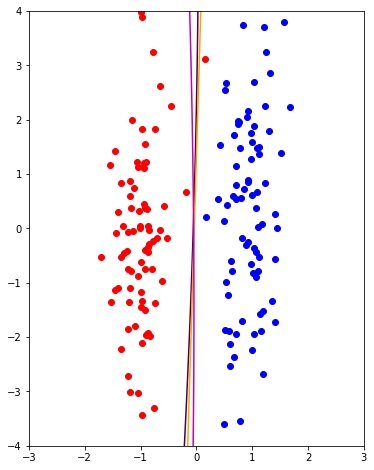

In [6]:
size = 80

mu0 = np.array([-1, 0])
Sigma0 = np.array([[0.1, 0], [0, 2]])
x0 = np.random.multivariate_normal(mu0, Sigma0, size=size)
m0 = np.mean(x0, axis=0)
S0 = (x0 - m0).T @ (x0 - m0)/size

mu1 = np.array([1, 0])
Sigma1 = np.array([[0.1, 0], [0, 3]])
x1 = np.random.multivariate_normal(mu1, Sigma1, size=size)
m1 = np.mean(x1, axis=0)
S1 = (x1- m1).T @ (x1 - m1)/size

x = np.array(np.arange(-5, 5, 0.1))
y = np.array(np.arange(-5, 5, 0.1))
X, Y = np.meshgrid(x, y)

f = decision_boundary(m0, S0, m1, S1)
Z = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        Z[i, j] = f(np.array([x[i], y[j]]))
        

S_pooled = 0.5*(S0 + S1)
        
ff = decision_boundary(m0, S_pooled, m1, S_pooled)
ZZ = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        ZZ[i, j] = ff(np.array([x[i], y[j]]))
        
SS0 = np.diag(np.sum((x0 - m0)*(x0 - m0), axis=0))
SS1 = np.diag(np.sum((x1 - m1)*(x1 - m1), axis=0))
fff = decision_boundary(m0, SS0, m1, SS1)
ZZZ = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        ZZZ[i, j] = fff(np.array([x[i], y[j]]))

plt.figure(figsize=(6, 8))
plt.xlim(-3, 3)
plt.ylim(-4, 4)        
plt.plot(x0[:,0], x0[:,1], 'ro')
plt.plot(x1[:,0], x1[:,1], 'bo')
plt.contour(x, y, Z.T, [0])
plt.contour(x, y, ZZ.T, [0], colors="orange")
plt.contour(x, y, ZZZ.T, [0], colors=['m'])
plt.show()

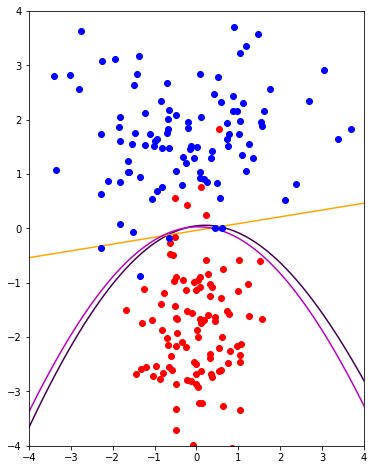

In [7]:
size = 100

mu0 = np.array([0, -1.7])
Sigma0 = np.array([[0.5, 0], [0, 1]])
x0 = np.random.multivariate_normal(mu0, Sigma0, size=size)
m0 = np.mean(x0, axis=0)
S0 = (x0 - m0).T @ (x0 - m0)/size

mu1 = np.array([0, 1.7])
Sigma1 = np.array([[2, 0.2], [0.2, 1]])
x1 = np.random.multivariate_normal(mu1, Sigma1, size=size)
m1 = np.mean(x1, axis=0)
S1 = (x1- m1).T @ (x1 - m1)/size

x = np.array(np.arange(-5, 5, 0.1))
y = np.array(np.arange(-5, 5, 0.1))
X, Y = np.meshgrid(x, y)

f = decision_boundary(m0, S0, m1, S1)
Z = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        Z[i, j] = f(np.array([x[i], y[j]]))

S_pooled = 0.5*(S0 + S1)
        
ff = decision_boundary(m0, S_pooled, m1, S_pooled)
ZZ = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        ZZ[i, j] = ff(np.array([x[i], y[j]]))
        
SS0 = np.diag(np.sum((x0 - m0)*(x0 - m0), axis=0))
SS1 = np.diag(np.sum((x1 - m1)*(x1 - m1), axis=0))
fff = decision_boundary(m0, SS0, m1, SS1)
ZZZ = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        ZZZ[i, j] = fff(np.array([x[i], y[j]]))

plt.figure(figsize=(6, 8))
plt.xlim(-4, 4)
plt.ylim(-4, 4)        
plt.plot(x0[:,0], x0[:,1], 'ro')
plt.plot(x1[:,0], x1[:,1], 'bo')
plt.contour(x, y, Z.T, [0])
plt.contour(x, y, ZZ.T, [0], colors="orange")
plt.contour(x, y, ZZZ.T, [0], colors=['m'])
plt.show()

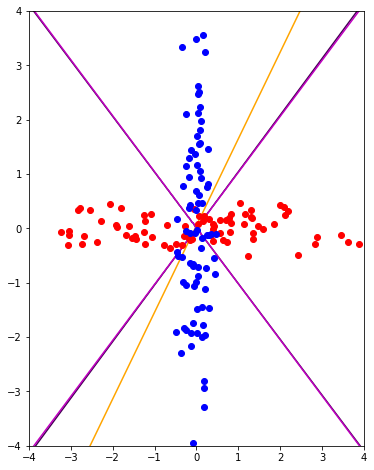

In [8]:
size = 80

mu0 = np.array([0, 0])
Sigma0 = np.array([[3, 0], [0, 0.05]])
x0 = np.random.multivariate_normal(mu0, Sigma0, size=size)
m0 = np.mean(x0, axis=0)
S0 = (x0 - m0).T @ (x0 - m0)/size

mu1 = np.array([0, 0])
Sigma1 = np.array([[0.05, 0], [0, 3]])
x1 = np.random.multivariate_normal(mu1, Sigma1, size=size)
m1 = np.mean(x1, axis=0)
S1 = (x1- m1).T @ (x1 - m1)/size


x = np.array(np.arange(-5, 5, 0.1))
y = np.array(np.arange(-5, 5, 0.1))
X, Y = np.meshgrid(x, y)

f = decision_boundary(m0, S0, m1, S1)
Z = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        Z[i, j] = f(np.array([x[i], y[j]]))

S_pooled = 0.5*(S0 + S1)
        
ff = decision_boundary(m0, S_pooled, m1, S_pooled)
ZZ = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        ZZ[i, j] = ff(np.array([x[i], y[j]]))
        
SS0 = np.diag(np.sum((x0 - m0)*(x0 - m0), axis=0))
SS1 = np.diag(np.sum((x1 - m1)*(x1 - m1), axis=0))
fff = decision_boundary(m0, SS0, m1, SS1)
ZZZ = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        ZZZ[i, j] = fff(np.array([x[i], y[j]]))

plt.figure(figsize=(6, 8))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.plot(x0[:,0], x0[:,1], 'ro')
plt.plot(x1[:,0], x1[:,1], 'bo')
plt.contour(x, y, Z.T, [0])
plt.contour(x, y, ZZ.T, [0], colors=['orange'])
plt.contour(x, y, ZZZ.T, [0], colors=['m'])
plt.show()

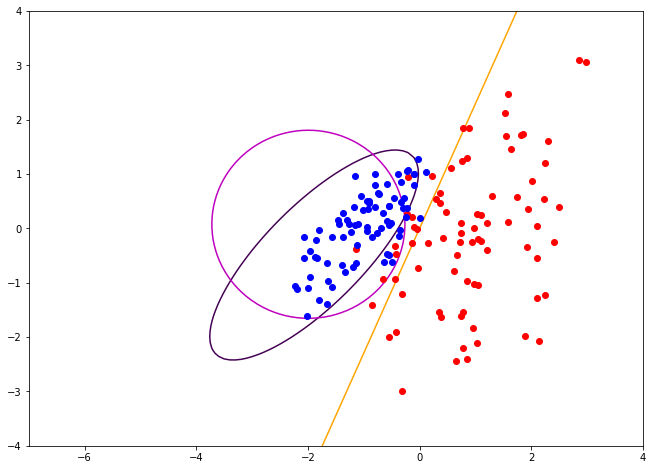

In [9]:
size = 80

v0 = np.array([0.5, np.sqrt(3)/2])
v1 = np.array([-np.sqrt(3)/2, 0.5])
v = np.array([v0, v1]).T
Sigma0 = v @ np.diag([2, 0.5]) @ v.T
mu0 = np.array([1, 0])
x0 = np.random.multivariate_normal(mu0, Sigma0, size=size)
m0 = np.mean(x0, axis=0)
S0 = (x0 - m0).T @ (x0 - m0)/size
SS0 = np.diag(np.sum((x0 - m0)*(x0 - m0), axis=0))

u0 = np.array([0.5, 0.5])/np.sqrt(2)
u1 = np.array([-0.5, 0.5])/np.sqrt(2)
u = np.array([u0, u1]).T
Sigma1 = u @ np.diag([3, 0.5]) @ u.T
mu1 = np.array([-1, 0])
x1 = np.random.multivariate_normal(mu1, Sigma1, size=size)
m1 = np.mean(x1, axis=0)
S1 = (x1 - m1).T @ (x1 - m1)/size

x = np.array(np.arange(-10, 10, 0.1))
y = np.array(np.arange(-10, 10, 0.1))
X, Y = np.meshgrid(x, y)

f = decision_boundary(m0, S0, m1, S1)
Z = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        Z[i, j] = f(np.array([x[i], y[j]]))

S_pooled = 0.5*(S0 + S1)
        
ff = decision_boundary(m0, S_pooled, m1, S_pooled)
ZZ = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        ZZ[i, j] = ff(np.array([x[i], y[j]]))
        
SS0 = np.diag(np.sum((x0 - m0)*(x0 - m0), axis=0))
SS1 = np.diag(np.sum((x1 - m1)*(x1 - m1), axis=0))
fff = decision_boundary(m0, SS0, m1, SS1)
ZZZ = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        ZZZ[i, j] = fff(np.array([x[i], y[j]]))

plt.figure(figsize=(11, 8))
plt.xlim(-7, 4)
plt.ylim(-4, 4)
plt.plot(x0[:,0], x0[:,1], 'ro')
plt.plot(x1[:,0], x1[:,1], 'bo')
plt.contour(x, y, Z.T, [0])
plt.contour(x, y, ZZ.T, [0], colors=['orange'])
plt.contour(x, y, ZZZ.T, [0], colors=['m'])
# plt.gca().set_aspect('equal', 'datalim')
plt.show()

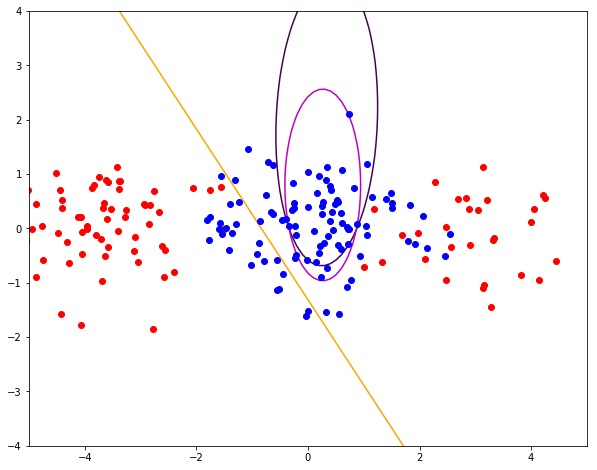

In [15]:
size = 100

mu00 = np.array([-4, 0])
Sigma0 = np.array([[1, 0], [0, 0.5]])
x00 = np.random.multivariate_normal(mu00, Sigma0, size=70)
mu01 = np.array([3, 0])
x01 = np.random.multivariate_normal(mu01, Sigma0, size=30)
x0 = np.vstack([x00, x01])
m0 = np.mean(x0, axis=0)
S0 = (x0- m0).T @ (x0 - m0)/size

mu1 = np.array([0, 0])
Sigma1 = np.array([[1, 0], [0, 0.5]])
x1 = np.random.multivariate_normal(mu1, Sigma1, size=size)
m1 = np.mean(x1, axis=0)
S1 = (x1- m1).T @ (x1 - m1)/size

x = np.array(np.arange(-5, 5, 0.1))
y = np.array(np.arange(-5, 5, 0.1))
X, Y = np.meshgrid(x, y)

f = decision_boundary(m0, S0, m1, S1)
Z = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        Z[i, j] = f(np.array([x[i], y[j]]))
        

S_pooled = 0.5*(S0 + S1)
        
ff = decision_boundary(m0, S_pooled, m1, S_pooled)
ZZ = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        ZZ[i, j] = ff(np.array([x[i], y[j]]))
        
SS0 = np.diag(np.sum((x0 - m0)*(x0 - m0), axis=0))
SS1 = np.diag(np.sum((x1 - m1)*(x1 - m1), axis=0))
fff = decision_boundary(m0, SS0, m1, SS1)
ZZZ = np.zeros((len(x), len(y)))

for i in range(len(x)):
    for j in range(len(y)):
        ZZZ[i, j] = fff(np.array([x[i], y[j]]))

plt.figure(figsize=(10, 8))
plt.xlim(-5, 5)
plt.ylim(-4, 4)        
plt.plot(x0[:,0], x0[:,1], 'ro')
plt.plot(x1[:,0], x1[:,1], 'bo')
plt.contour(x, y, Z.T, [0])
plt.contour(x, y, ZZ.T, [0], colors="orange")
plt.contour(x, y, ZZZ.T, [0], colors=['m'])
plt.show()